In [ ]:
pip install superflexpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for superflexpy: filename=superflexpy-1.3.1-py3-none-any.whl size=61809 sha256=e2350672bdc9ca7ae3f33fd1bb8770ee44ea210aa7cc1e7415fab1480f027c2f
  Stored in directory: /root/.cache/pip/wheels/b4/c8/2f/cd5d27401cd7510c9b8cd124a1cd69671c0569c246e7233bdc
Successfully built superflexpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('/content/drive/MyDrive/karathodu/precip_year.csv',header= None)
precipitation=df.loc[1:30,0]
precipitation1=precipitation.to_numpy()
df1= pd.read_csv('/content/drive/MyDrive/karathodu/pet_y.csv',header= None)
pet= df1.loc[1:30,0]
pet1= pet.to_numpy()
df2= pd.read_csv('/content/drive/MyDrive/karathodu/flow_y.csv',header= None)
flow= df2.loc[1:30,0]
flow1= flow.to_numpy()

In [ ]:
from superflexpy.implementation.elements.hbv import PowerReservoir
from superflexpy.implementation.elements.thur_model_hess import HalfTriangularLag
from superflexpy.implementation.elements.gr4j import UnitHydrograph1
from superflexpy.implementation.root_finders.pegasus import PegasusPython
from superflexpy.implementation.numerical_approximators.implicit_euler import ImplicitEulerPython
from superflexpy.framework.unit import Unit
from superflexpy.framework.node import Node
solver_python=PegasusPython()
approximator=ImplicitEulerPython(root_finder=solver_python)
from superflexpy.framework.network import Network
from superflexpy.framework.element import BaseElement
from superflexpy.framework.element import ODEsElement
from superflexpy.implementation.elements.gr4j import InterceptionFilter
from superflexpy.implementation.elements.hbv import UnsaturatedReservoir
from superflexpy.implementation.elements.hymod import LinearReservoir
from superflexpy.implementation.elements.structure_elements import Transparent,Junction, Splitter


**MODEL BUILDING**

In [ ]:
SR1=PowerReservoir(
    parameters={'k':0.01,'alpha':0.8},
    states={'S0':10.0},
    approximation=approximator,
    id='slow'
)
pr1=PowerReservoir(
    parameters={'k':0.1,'alpha':2.0},
    states={'S0':20.0},
    approximation=approximator,
    id='fast'
)
splitter = Splitter(weight=[[0.1], [0.9]],
                    direction=[[0], [0]],
                    id='spl')
lag_function = UnitHydrograph1(parameters={'lag-time': 2.0},
                                    states={'lag': None},
                                    id='lag-1')
junction = Junction(direction=[[0, 0]],
                 id='jun')
unsaturated = UnsaturatedReservoir(
   parameters={'Smax': 25.0, 'Ce': 1.0, 'm': 0.1, 'beta': 1.0},
   states={'S0': 10.0},
   approximation=approximator,
   id='unsaturated'
)
interception_filter = InterceptionFilter(id='ir')


In [ ]:
unit_1=Unit(layers=[[interception_filter],
                     [unsaturated],
                   [splitter],
                   [SR1,lag_function],
                   [junction],],
           id='model2')
unit_2=Unit(layers=[[unsaturated],
                   [splitter],
                   [pr1,lag_function],
                   [junction],],
           id='model-3')
unit_3=Unit(layers=[[SR1],
                   [splitter],
                   [pr1,lag_function],
                   [junction],],
           id='model-1')


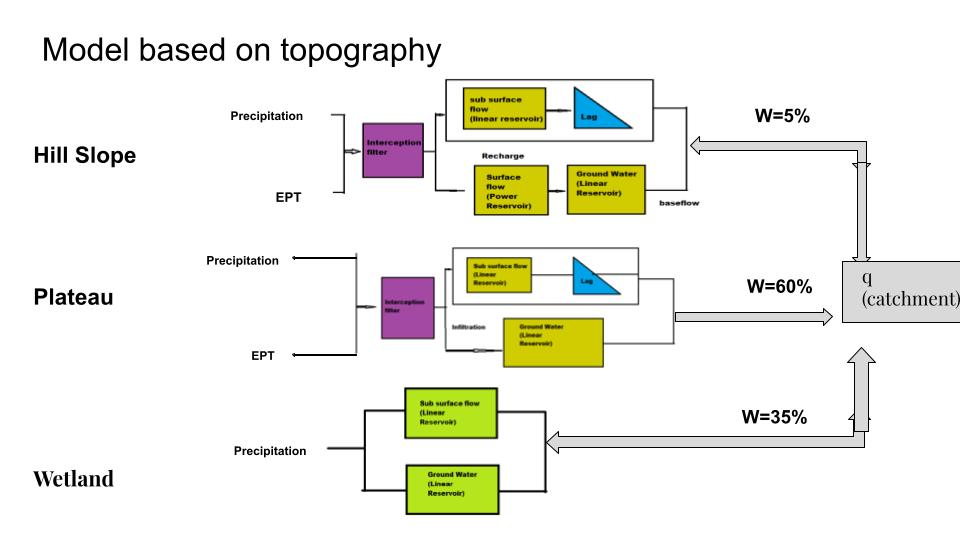

**WEIGHT DISTRIBUTION**

In [ ]:
node_1 = Node(
   units=[unit_1,unit_2,unit_3],
   weights=[0.05,0.6,0.35],
   area=10.0,
   id='node-1'
   )

**YEARLY FLOW SIMULATION**

In [ ]:
node_1.set_input([precipitation1,pet1])
node_1.set_timestep(1.0)
output1=node_1.get_output()

/usr/local/lib/python3.7/dist-packages/superflexpy/implementation/elements/hbv.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  - k[ind] * alpha[ind] * S**(alpha[ind] - 1)


Text(0, 0.5, 'Discharge (mm/year)')

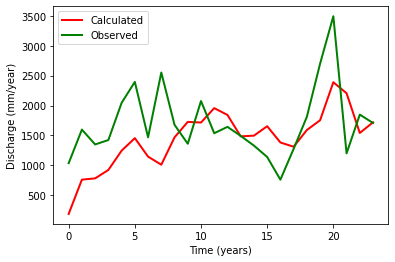

In [ ]:
import matplotlib.pyplot as plt
x= list(range(len(precipitation1)))
y1=np.transpose(output1)
y2=np.transpose(flow1)
plt.plot(x,y1,color='red',lw=2)
plt.plot(x,y2,color='green',lw=2)
plt.legend(['Calculated','Observed'])
plt.xlabel('Time (years)')
plt.ylabel('Discharge (mm/year)')

**MONTHLY FLOW SIMULATION**

In [ ]:
import pandas as pd
import numpy as np
df3= pd.read_csv('/content/drive/MyDrive/karathodu/month_p.csv',header= None)
precipitation2=df3.loc[0:12,1]
precipitation3=precipitation2.to_numpy()
df4= pd.read_csv('/content/drive/MyDrive/karathodu/pet_m.csv',header= None)
pet2= df4.loc[0:12,0]
pet3= pet2.to_numpy()
df5= pd.read_csv('/content/drive/MyDrive/karathodu/flow_m.csv',header= None)
flow2= df5.loc[0:12,0]
flow3= flow2.to_numpy()

In [ ]:
flow3

array([ 60.76085073,  65.75325006,  58.15957488,  62.06769183,
        61.99931055, 221.8897619 , 371.5160052 , 222.4623542 ,
       179.01819   , 190.6757588 , 121.3001713 ,  70.46843067])

In [ ]:
node_1.set_input([precipitation3,pet3])
node_1.set_timestep(1.0)
output2=node_1.get_output()

/usr/local/lib/python3.7/dist-packages/superflexpy/implementation/elements/hbv.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  - k[ind] * alpha[ind] * S**(alpha[ind] - 1)


Text(0, 0.5, 'Discharge (mm/month)')

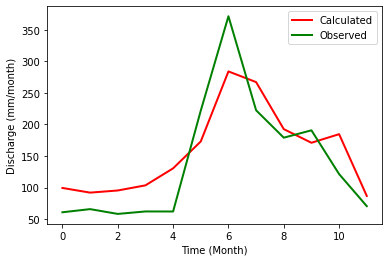

In [ ]:
import matplotlib.pyplot as plt
x2= list(range(len(precipitation3)))
y3=np.transpose(output2)
y4=np.transpose(flow3)
plt.plot(x2,y3,color='red',lw=2)
plt.plot(x2,y4,color='green',lw=2)
plt.legend(['Calculated','Observed'])
plt.xlabel('Time (Month)')
plt.ylabel('Discharge (mm/month)')

**DAILY FLOW SIMULATION**

In [ ]:
import pandas as pd
import numpy as np
df5= pd.read_csv('/content/drive/MyDrive/karathodu/p_day.csv',header= None)
precipitation4=df5.loc[0:365,0]
precipitation5=precipitation4.to_numpy()
df6= pd.read_csv('/content/drive/MyDrive/karathodu/PET_daily.csv',header= None)
pet4= df6.loc[0:365,0]
pet5= pet4.to_numpy()
df7= pd.read_csv('/content/drive/MyDrive/karathodu/flow_day.csv',header= None)
flow4= df7.loc[0:365,0]
flow5= flow4.to_numpy()

In [ ]:
node_1.set_input([precipitation5,pet5])
node_1.set_timestep(1.0)
output3=node_1.get_output()

/usr/local/lib/python3.7/dist-packages/superflexpy/implementation/elements/hbv.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  - k[ind] * alpha[ind] * S**(alpha[ind] - 1)


Text(0, 0.5, 'Discharge (mm/day)')

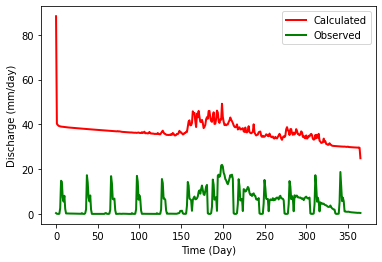

In [ ]:
import matplotlib.pyplot as plt
x3= list(range(len(precipitation5)))
y5=np.transpose(output3)
y6=np.transpose(flow5)
plt.plot(x3,y5,color='red',lw=2)
plt.plot(x3,y6,color='green',lw=2)
plt.legend(['Calculated','Observed'])
plt.xlabel('Time (Day)')
plt.ylabel('Discharge (mm/day)')